<a href="https://colab.research.google.com/github/PaulaDCV/SimilarityComparison/blob/main/Similarity_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


The following notebook investigates the different running times of similarity algorithms to documents. The two main algorithms investigated are Jaccard's similarity and Cosine similarity. Therefore the runtimes and complexity for these algorithms is compared, when looking at the cosine similarity there is an investigation on different variations of this algorithm described below. There is a collection of at least 10 documents where each document contains at least 50 words.
The first question will look at Jaccards algorithm and discuss its runtime and complexity applied to documents with different lengths represented as bag of words.
Question two is very similar to the previous one but using Cosine similarity and a dense representation of the documents, in this case, vectors. There is also a focus on whether using a custom function for calculating the dot product or using numpys dot product function makes a difere.
Question three focuses on cosine similarity of different document lengths again, but this time using a sparse representation, for this i used a bag of words approach again.
Question four differs from the previous ones as it investigates the runtime and complexity for different algorithms when calculating the similarity between each document pair in a collection. This question also looks at whether the different similarity algorithms affect the runtime.
Question five investigates parallel computing to calculate all document pair similarities. This question focuses on implementing the mapReduce algorithm and how many processes are the most efficient to calculate similarity

## Imports and Basic functions
The following code contains the imports needed and prepares the document collection which will be used throughout the notebook, it also contains the time function used to evaluate how long it takes to run a function.

In [ ]:
import nltk
import time
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
nltk.download('gutenberg')
nltk.download('brown')
from nltk.corpus import gutenberg,brown
import math
import numpy as np
import helper

#import operator
from collections import defaultdict

from multiprocessing import Pool

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/delcastillovivero/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/delcastillovivero/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
#Function to generate bag of words
def makeBowDictionary(doc):
    #Dictionary where keys are words and values are frequencies
    bow = {}
    #Loop through every word in document
    for word in doc:
        frequency = bow.get(word,0)
        bow[word] = frequency + 1
    return bow

In [ ]:
corpusDicts = []
corpusLists = []

#Loop through document collections and create a list of them as well as a bag of words for each document
for fieldid in gutenberg.fileids():
    corpusLists.append(gutenberg.words(fieldid))
    corpusDicts.append(makeBowDictionary(gutenberg.words(fieldid)))

for fieldid in brown.fileids():
    corpusLists.append(brown.words(fieldid))
    corpusDicts.append(makeBowDictionary(brown.words(fieldid)))



In [ ]:
#Function to time how long it takes to run a function
def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
    #Times the function will run
    while repeats>0:

        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()

        #total time the function has taken to run
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1

    #After all repeats calculate averages, std and error.
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(len(times)**0.5)

    return (mean,error)

# Jaccard Similarity

Jaccards similarity is a measurement used to define the similarity between two sets. This is done by using the number of elements in the intersection of the two sets and dividing it by the size of the number of elements in both sets. Given two sets A and B, the Jaccards similarity measurement can be obtained with the following formula:
    $J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$
In this case a bag version of Jaccard's is used. This allows, to represent duplicate elements. Each document is represented as a bag of words, using a dictionary each key is a word in the document and its value is the frequency in which it appears in the document.

The algorithm goes through every word in one of the documents and then checks if these are in the second document, this is used to calculate the intersection, the minimum frequency of the word in both documents. The union is then calculating by adding all the values from both documents and subtracting the intersection as these are duplicated values.

## Theoretical analysis
There is a for loop that goes through all the elements of a dictionary, assuming the length of the dictionary is 'n this for loop will take O(N), this is assuming there are no hash collisions, the if statement will only take O(1) to run therefore the complexity is O(N). We have to keep in mind this is because we are using a bag of words approach otherwise when using sets, as the algorithm has to loop through both lists the if statement would take O(N) too, so in a sets approach using lists, the runtime would be O(N^2)

In [ ]:
 def jaccard(doc1,doc2):
    intersection={}
    #Loop through words in document1
    for item in doc1.keys():
        #Check id they're in document 1
        if item in doc2.keys():
            #Get minimum frequency
            intersection[item]=min(doc1[item],doc2[item])

    #Calculate intersection
    intersectiontot=sum(intersection.values())
    #Calculate union
    union = sum(doc1.values())+sum(doc2.values())-intersectiontot
    return intersectiontot/union

## Runtimes

In [ ]:
xs = []
ys = []
#Calculating different runtimes for different sizes
for i in range(2000,200000,200):

    docA = makeBowDictionary(((corpusLists[1])+corpusLists[11])[:i])
    docB =  makeBowDictionary(((corpusLists[2])+corpusLists[12])[:i])

    xs.append(len(docB))
    ys.append(timeit(jaccard, docA,docB)[0])

The following graph shows the different runtimes for Jaccards algorithm when inputting documents of different sizes

Text(0.5, 1.0, 'Running Time of jaccard')

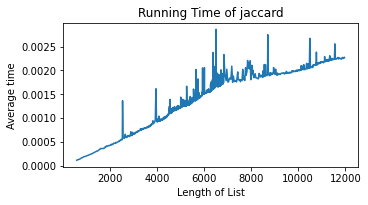

In [ ]:
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(xs,ys)
plt.xlabel("Length of Document")
plt.ylabel("Average time")
plt.title("Running Time of jaccard")

## Calculating complexity and constant
To calculate the complexity we can plot logarithm graphs. Since the complexity can be defined as $y=c_a.x^n$, where $c_a$ is the constant for my own computer, then we can use logarithms on the previous equation which will give us: $\log(y) = \log(c_a) + n \log(x)$
Plotting a graph of $\log(y)$ against $\log(x)$ the gradient will represent n and the y intercept will be $\log(c_a)$.

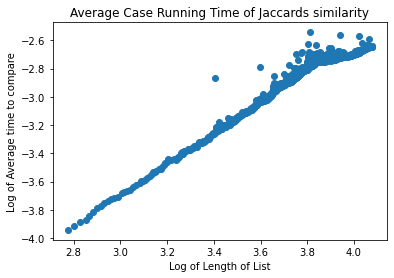

Slope is 0.9793240784704175, intercept is -6.555619184521418 and error is 0.0068792355245654874


In [ ]:

logxs=[np.log10(x) for x in xs]
logys=[np.log10(y) for y in ys]

plt.scatter(logxs,logys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to compare")
plt.title("Average Case Running Time of Jaccards similarity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {}, intercept is {} and error is {}".format(slope,intercept,std_err))

The results give us the slope being 0.98 this is very close to one, which agrees with the theoretical analysis that tells us $O(n)$ which is the same as $O(n^1)$ The intercept is -6.56, which therefore means the constant for my computer is $10 ^{-6.56}$

# Cosine similarity


Cosine similarity is a metric used to calculate how similar two documents are
The advantage when using this measurement that when comparing word frequencies, the longer the documents are the more likely to be more common words even if documents are not actually similar. similar.  are irrespective of their size.
Mathematically,  the cosine of the angle between two vectors projected in a multi-dimensional space is measured.
The formula to calculate the cosine similarity is the following:
$Cos(d1,d2) = \cfrac{d1 . d2}{\sqrt{d1.d1 x d2.d2}}$

## Theoretical runtime
<> program runs asldslajdasdjasl

In [ ]:
#Given a list of dictionaries make a matrix out of them
def make_matrix(list_of_dicts):
    #first of all make a list of all of the features that occur in any document - these will be the dimensions of the matrix
    allfeatures={}
    for docdict in list_of_dicts:
        for feat in docdict.keys():
            allfeatures[feat]=1

    dimensions=list(allfeatures.keys())
    #don't strictly need to sort it - but it is good practise to make sure it is reproducible
    sorted(dimensions)

    matrix=[]
    #each row in the matrix will be one of the dimensions
    for dimension in dimensions:
        row=[]
        #look up the appropriate value for each document
        for docdict in list_of_dicts:
            row.append(docdict.get(dimension,0)) #this will append the document's value if present, 0 otherwise
        matrix.append(row)


    return matrix

##it might be useful to be able to transpose a matrix so we can compare documents
def transpose(matrix):
    transposed=[]
    for i in range(0,len(matrix[0])):
        transposed.append([row[i] for row in matrix])

    return transposed




In [ ]:
#Calculate dot product
def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]

    return total

#Cosine similarity using custom product
def cosineCustom(v1,v2):

    return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))

#Cosine similarity using numpy
def cosineNp(v1,v2):
    return np.dot(v1,v2)/math.sqrt(np.dot(v1,v1)*np.dot(v2,v2))




In [ ]:
xsCosDot = []
ysCosDot=[]

#Calculating different runtimes for different sizes
for i in range(1000,500000,5000):

    docA = makeBowDictionary(((corpusLists[2])+corpusLists[11])[:i])
    docB =  makeBowDictionary(((corpusLists[4])+corpusLists[12])[:i])
    amatrix=make_matrix([docA,docB])
    docvectors = transpose(amatrix)
    xsCosDot.append(len(docB))
    ysCosDot.append(timeit(cosineCustom, docvectors[0],docvectors[1])[0])


The following graph shows the different runtimes for Cosine's algorithm when inputting documents of different sizes using the custom dot product

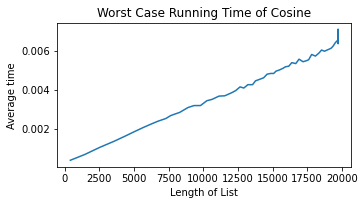

In [ ]:
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(xsCosDot,ysCosDot)
plt.xlabel("Length of List")
plt.ylabel("Average time")
plt.title("Running Time of Cosine")
import scipy.stats as stats


## Calculating complexity and constant
To calculate the complexity and constant the process is the same as previously described we apply logarithms to get  $log(𝑦)=log(𝑐𝑎)+𝑛log(𝑥)$

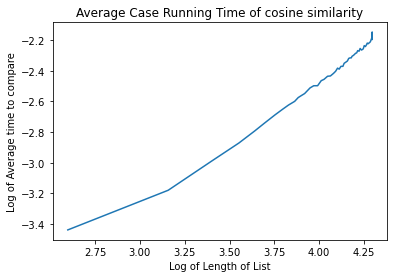

Slope is 0.8572147073453654, intercept is -5.874015323835581 and error is 0.01249463119979563


In [ ]:

logCustomxs=[np.log10(x) for x in xsCosDot]
logCustomys=[np.log10(y) for y in ysCosDot]

plt.plot(logCustomxs,logCustomys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to compare")
plt.title("Running Time of cosine similarity")
plt.show()

slopeCosCustom, intercept, r_value, p_value, std_err = stats.linregress(logCustomxs, logCustomys)
print("Slope is {}, intercept is {} and error is {}".format(slopeCosCustom,intercept,std_err))

The results give us a slope of 0.857, this is very close to one, which agrees with the theoretical analysis that tells us 𝑂(𝑛) which is the same as $𝑂(𝑛^1)$. The intercept is -5.87, which therefore means the constant for my computer is  $10^{−6.56}$

## Numpy implementation
The following code records the times for cosine similarity but this time using numpys dot product implementation

In [ ]:

xsCosNp = []
ysCosNp=[]
#Calculating different runtimes for different sizes
for i in range(1000,500000,5000):

    docA = makeBowDictionary(((corpusLists[2])+corpusLists[11])[:i])
    docB =  makeBowDictionary(((corpusLists[4])+corpusLists[12])[:i])
    amatrix=make_matrix([docA,docB])
    docvectors = transpose(amatrix)

    xsCosNp.append(len(docB))
    ysCosNp.append(timeit(cosineNp, docvectors[0],docvectors[1])[0])

In [ ]:
xsCosNp = []
ysCosNp=[]
#Calculating different runtimes for different sizes
for i in range(1000,500000,5000):
    docA = makeBowDictionary(((corpusLists[2])+corpusLists[11])[:i])
    docB =  makeBowDictionary(((corpusLists[4])+corpusLists[12])[:i])
    amatrix=make_matrix([docA,docB])
    docvectors = transpose(amatrix)
    docvectors = np.array(docvectors)
    xsCosNp.append(len(docB))
    ysCosNp.append(timeit(cosineNp, docvectors[0],docvectors[1])[0])

The following graph shows the different runtimes for Cosine's algorithm when inputting documents of different sizes using the numpy dot product implementation

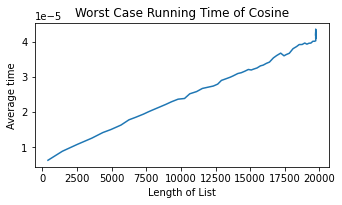

In [ ]:
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(xsCosNp,ysCosNp)
plt.xlabel("Length of List")
plt.ylabel("Average time")
plt.title("Worst Case Running Time of Cosine")
import scipy.stats as stats


## Calculating complexity and constant
To calculate the complexity and constant the process is the same as previously described we apply logarithms to get  $log(𝑦)=log(𝑐𝑎)+𝑛log(𝑥)$

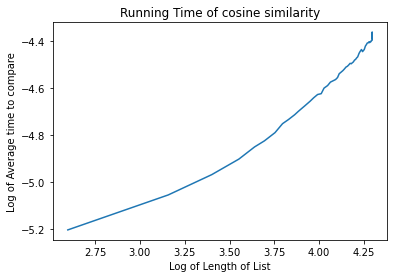

Slope is 0.6101131722490294, intercept is -7.0190695301582515 and error is 0.014160462136604001


In [ ]:

logNpxs=[np.log10(x) for x in xsCosNp]
logNpys=[np.log10(y) for y in ysCosNp]

plt.plot(logNpxs,logNpys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to compare")
plt.title("Running Time of cosine similarity")
plt.show()

slopeCosNp, intercept, r_value, p_value, std_err = stats.linregress(logNpxs, logNpys)
print("Slope is {}, intercept is {} and error is {}".format(slopeCosNp,intercept,std_err))



The results give us a slope of 0.856, this is very close to one, which agrees with the theoretical analysis that tells us 𝑂(𝑛) which is the same as $𝑂(𝑛^1)$. The intercept is -5.74, which therefore means the constant for my computer is  $10^{−5.74}$

## Comparing Cosine similarity with different dot products
The following graphs outputs the different runtimes for the two previous implementation.
Theoretically numpy should have faster running times as numpy functions are implemented in C, it is also able to divide a task into separate subtasks and perform them in parallel.

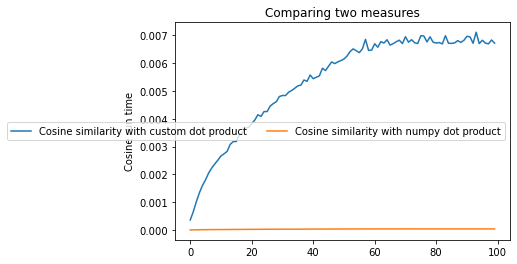

In [ ]:
plt.plot(ysCosDot)
plt.plot(ysCosNp)
plt.title("Comparing two measures")
label = ["Cosine similarity with custom dot product","Cosine similarity with numpy dot product"]
plt.legend(label, loc = 0, ncol = 2)
plt.ylabel('Cosine run time')
plt.show()


In [ ]:
print("CustomDot complexity n^",slopeCosCustom,"Numpy complexity n^", slopeCosNp)

CustomDot complexity n^ 0.8572147073453654 Numpy complexity n^ 0.6101131722490294


The results show that numpy is faster in this case  in terms of runtime, which is what was expected, the complexity for numpy is almos 0.25 less than the custom implementation.

# Cosine Similarity using Sparse representation


The formula used to calculate similarity for this implementation is the same as the previous cosine implementations, the difference is how the dot product is calculated as the data is input through a bag of words dictionary. Therefore to calculate the dot product, the dot function loops through every word in the first document if the word does not exist in the second document it will be counted as a 0.

In [ ]:
import math
import numpy as np

def dotDict(v1,v2):
    total=0
    for word,count in v1.items():
        total += count * v2.get(word,0)
    return total

def cosineDict(v1,v2):
    return dotDict(v1,v2)/math.sqrt(dotDict(v1,v1)*dotDict(v2,v2))


## Function Correctness

In [ ]:
docA = makeBowDictionary((corpusLists[1]))
docB =  makeBowDictionary((corpusLists[2]))
amatrix = make_matrix([docA,docB])
docvectors = transpose(amatrix)

print("Vector similarity",cosineDot(docvectors[0],docvectors[1]))

print("Similarity ",cosineDict(docA,docB))


Vector similarity 0.9850692510919175
Similarity  0.9850692510919175


To evaluate that the function returns the correct result I calculated the similarity using the sparse function, which uses dictionaries and the function using the custom Dot product implementation, the outputs from both functions are the same therefore we can assume that the sparse implementation is correct as the calculated similarity produced is the same one produced by the previous implementation.



In [ ]:

xsCosDict = []
ysCosDict=[]
#Calculating different runtimes for different sizes
for i in range(1000,300000,2000):

    docA = makeBowDictionary(((corpusLists[1])+corpusLists[11])[:i])
    docB =  makeBowDictionary(((corpusLists[2])+corpusLists[12])[:i])

    xsCosDict.append(len(docB))
    ysCosDict.append(timeit(cosineDict, docA,docB)[0])

The following graph shows the different runtimes for Cosine algorithm with a sparse input  representing documents of different sizes

Text(0.5, 1.0, 'Worst Case Running Time of Cosine')

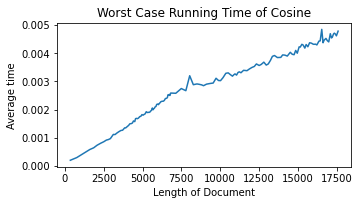

In [ ]:
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(xsCosDict,ysCosDict)
plt.xlabel("Length of Document")
plt.ylabel("Average time")
plt.title("Worst Case Running Time of Cosine")



## Runtime and constant

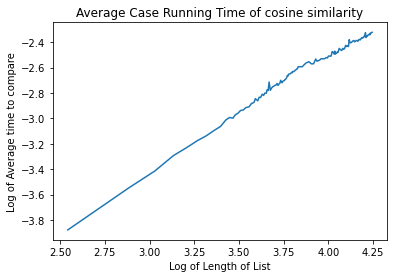

Slope is 0.8610941383073433, intercept is -5.952877735184288 and error is 0.008053540554504678


In [ ]:

logxs=[np.log10(x) for x in xsCosDict]
logys=[np.log10(y) for y in ysCosDict]

plt.plot(logxs,logys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to compare")
plt.title("Average Case Running Time of cosine similarity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {}, intercept is {} and error is {}".format(slope,intercept,std_err))

The results give us a slope of 0.857, this is very close to one, which agrees with the theoretical analysis that tells us 𝑂(𝑛) which is the same as $𝑂(𝑛^1)$. The intercept is -5.87, which therefore means the constant for my computer is  $10^{−6.56}$

# All pairs similarities

The following code implements a function which iterates through all documents to calculate their respective similarities. It allows different ways of calculating the similarity.
 Theoretically the algorithm should have a runtime of $O(n^2m)$ This is because There are 2 for loops which each run for the length of the document collection, this being n, then the similarity for each pair of documents is calculated, as shown before if the length of the document is m this is O(m)

In [ ]:
def allPairSimilarities(docCollection, similarity):
    similarities = []
    for docA in docCollection:
        rowsims=[]
        for docB in docCollection:
            if similarity == "jaccard":
                rowsims.append(jaccard(docA,docB))
            elif similarity =="cosine":
                rowsims.append(cosineDot(docA,docB))
            else:
                rowsims.append(cosineDict(docA,docB))
    similarities.append(rowsims)
    return similarities

In [ ]:
xsAllPairsCosine = []
ysAllPairsCosine = []

xsAllPairsJaccard=[]
ysAllPairsJaccard=[]

for i in range(10,30,2):
    print(i)
    amatrix = make_matrix(corpusDicts[:i])
    docvectors = transpose(amatrix)
    xsAllPairsCosine.append(i)
    ysAllPairsCosine.append(timeit(allPairSimilarities,docvectors,"cosine")[0])
    print(i)
    xsAllPairsJaccard.append(i)
    ysAllPairsJaccard.append(timeit(allPairSimilarities,corpusDicts[:i],"jaccard")[0])

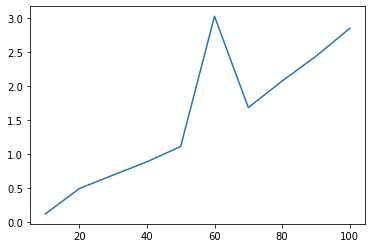

In [ ]:
plt.figure(1)
plt.plot(xsAllPairsJaccard[:15],ysAllPairsJaccard[:15])
plt.show()

## Runtim and Constant

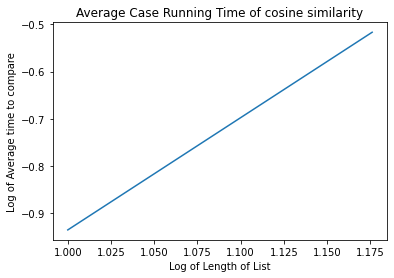

Slope is 1.316830414007544, intercept is -2.133960291398416 and error is 0.12629320754490753


In [ ]:

logxsAllPairsJaccard=[np.log10(x) for x in xsAllPairsJaccard[:15]]
logysAllPairsJaccard=[np.log10(y) for y in ysAllPairsJaccard]

plt.plot(logxsAllPairsJaccard,logysAllPairsJaccard)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to compare")
plt.title("Average Case Running Time of cosine similarity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
print("Slope is {}, intercept is {} and error is {}".format(slope,intercept,std_err))

# Parallel computing

In [ ]:

def map_reduce_parallel(inputs,mapper,reducer,mapper2,reducer2,mapprocesses=3,reduceprocesses=2):

    collector=defaultdict(list)  #this dictionary is where we will store intermediate results
                                 #it will map keys to lists of values (default value of a list is [])
                                 #in a real system, this would be stored in individual files at the map nodes
                                 #and then transferred to the reduce nodes

    mappool = Pool(processes=mapprocesses)
    #map stage

    mapresults=mappool.map(mapper,inputs)
    mappool.close()

    for mapresult in mapresults:
        for (key, value) in mapresult.items():     #pass each input to the mapper function and receive back each key,value pair yielded
            collector[key].append(value)     #append the value to the list for that key in the intermediate store
    #reduce stage
    outputs=[]
    reducepool = Pool(processes=reduceprocesses)
    reduceresults=reducepool.map(reducer,collector.items())
    reducepool.close()


    mappool = Pool(processes=mapprocesses)
    mapresults=mappool.map(mapper2,reduceresults)
    mappool.close()
    ocurrences = {}
    for item in mapresults:
        for (key,value) in item.items():
            o = ocurrences.get(key,[])
            ocurrences[key]= o+[value]
    reducepool = Pool(processes=reduceprocesses)
    reduceresults=reducepool.map(reducer2,ocurrences.items())
    reducepool.close()

    return reduceresults

('1', '2')
('1', '4')
('2', '3')
('3', '1')
('3', '4')
('4', '2')
('1', '2')
('1', '4')
('2', '3')
('3', '1')
('3', '4')
('4', '2')
(('1', '2'), [(1, 1), (1, 1)])
(('1', '4'), [(1, 1), (1, 2)])
(('2', '3'), [(1, 1), (1, 1)])
(('3', '1'), [(1, 1), (1, 1)])
(('3', '4'), [(1, 1), (1, 1)])
(('4', '2'), [(1, 1), (2, 1), (1, 1)])
(('1', '2'), [(1, 1), (1, 1)])
(('1', '4'), [(1, 1), (1, 2)])
(('2', '3'), [(1, 1), (1, 1)])
(('3', '1'), [(1, 1), (1, 1)])
(('3', '4'), [(1, 1), (1, 1)])
(('4', '2'), [(1, 1), (2, 1), (1, 1)])


In [ ]:
inputs = [["1","foo","bar","test"],["2","hello","test","foo"],["3","hello","bar","foo"],["4","test","foo","test","hello"]]
map_reduce_parallel(inputs,helper.map_wc1, helper.reduce,helper.mapWordWeights ,helper.reducerSim,mapprocesses=3,reduceprocesses=2)

[{('1', '2'): 0.5},
 {('1', '3'): 0.5},
 {('1', '4'): 0.3},
 {('2', '1'): 0.5},
 {('2', '3'): 0.5},
 {('2', '4'): 0.2222222222222222},
 {('3', '1'): 0.5},
 {('3', '2'): 0.5},
 {('3', '4'): 0.5},
 {('4', '1'): 0.3},
 {('4', '2'): 0.2222222222222222},
 {('4', '3'): 0.5}]

In [ ]:
docA = makeBowDictionary(inputs[0])
docB =  makeBowDictionary(inputs[1])
docC =  makeBowDictionary(inputs[2])
docD = makeBowDictionary(inputs[3])
print("1,2:",cosineDict(docA,docB))
print("2,3:",cosineDict(docB,docC))
print("3,4:",cosineDict(docC,docD))

1,2: 0.5
2,3: 0.5
3,4: 0.3779644730092272


In [ ]:
docIDs = []
for i in range(len(corpusLists)):
    x = list(corpusLists[i])
    x.insert(0,i)
    docIDs.append(x)


In [ ]:
map_reduce_parallel(docIDs[:10],helper.map_wc1, helper.reduce,helper.mapWordWeights ,helper.reducerSim,mapprocesses=3,reduceprocesses=2)

[{(0, 1): 4.750523865243894e-09},
 {(0, 2): 3.420934089445317e-09},
 {(0, 3): 3.3604010688373837e-10},
 {(0, 4): 4.84296999419484e-08},
 {(0, 5): 7.548847873910136e-09},
 {(0, 6): 2.350489968600564e-08},
 {(0, 7): 1.1246578442132259e-08},
 {(0, 8): 4.84291693404871e-09},
 {(0, 9): 5.36897149535307e-09},
 {(1, 0): 4.750523865243894e-09},
 {(1, 2): 6.352780635315339e-09},
 {(1, 3): 6.391851534564496e-10},
 {(1, 4): 9.251844313174932e-08},
 {(1, 5): 1.423118796466022e-08},
 {(1, 6): 4.3584912792834976e-08},
 {(1, 7): 2.105339164714237e-08},
 {(1, 8): 8.953936150625733e-09},
 {(1, 9): 1.0031274904479842e-08},
 {(2, 0): 3.420934089445317e-09},
 {(2, 1): 6.352780635315339e-09},
 {(2, 3): 4.4641272752214286e-10},
 {(2, 4): 6.521733171093555e-08},
 {(2, 5): 1.0002799078695565e-08},
 {(2, 6): 3.0643571176968614e-08},
 {(2, 7): 1.4996065510296645e-08},
 {(2, 8): 6.3439781463631855e-09},
 {(2, 9): 7.0611022609093326e-09},
 {(3, 0): 3.3604010688373837e-10},
 {(3, 1): 6.391851534564496e-10},
 {(3, 

In [ ]:
cosineDot(docvectors[0],docvectors[1])

0.9760888427113167

In [ ]:
import io
from IPython.nbformat import current

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347#:~:text=Even%20for%20the%20delete%20operation,also%20frees%20the%20memory%20faster.